**Project 1: Predicting Gallstone Disease from Clinical + Bioimpedance**

**Domain: Healthcare | Task type: Binary Classification | Data type: Tabular







In [2]:
# Access to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Primary aim:
Predict gallstone status (Yes/No) from 38 features. Target variable in the dataset:
“Gallstone Status”. Use case: strong tabular basis for ML gallstone prediction using
non-imaging features.

## Data cleaning and preprocessing

In [3]:
import pandas as pd
import numpy as np

df= pd.read_csv('/content/drive/MyDrive/DAT540_proj/dataset-uci.csv')


#df_data.shape
df.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [ ]:
#df_data.shape
df.info()
df.describe()

In [ ]:
# Check for missing data
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [ ]:
df.dtypes

In [ ]:
df['Gallstone Status'].unique()


array([0, 1])

In [ ]:
print(df.columns.tolist())


['Gallstone Status', 'Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']


In [ ]:
#That removes any extra spaces or newline characters from all column names.
df.columns = df.columns.str.strip()


In [14]:
target_col = [c for c in df.columns if 'Gallstone' in c][0]
print("Detected target column:", repr(target_col))


Detected target column: 'Gallstone Status'


In [15]:
print(df[target_col].unique())


[0 1]


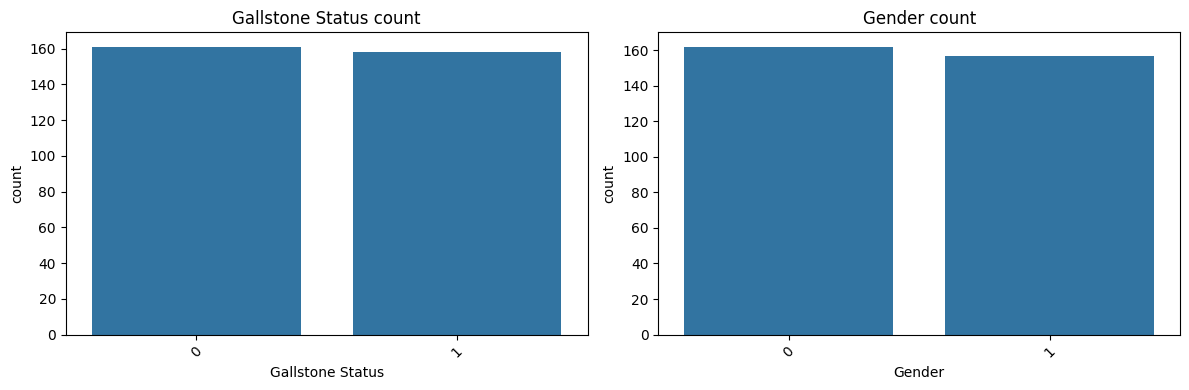

In [ ]:
categorical_cols = ['Gallstone Status', 'Gender']

plt.figure(figsize=(12,4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


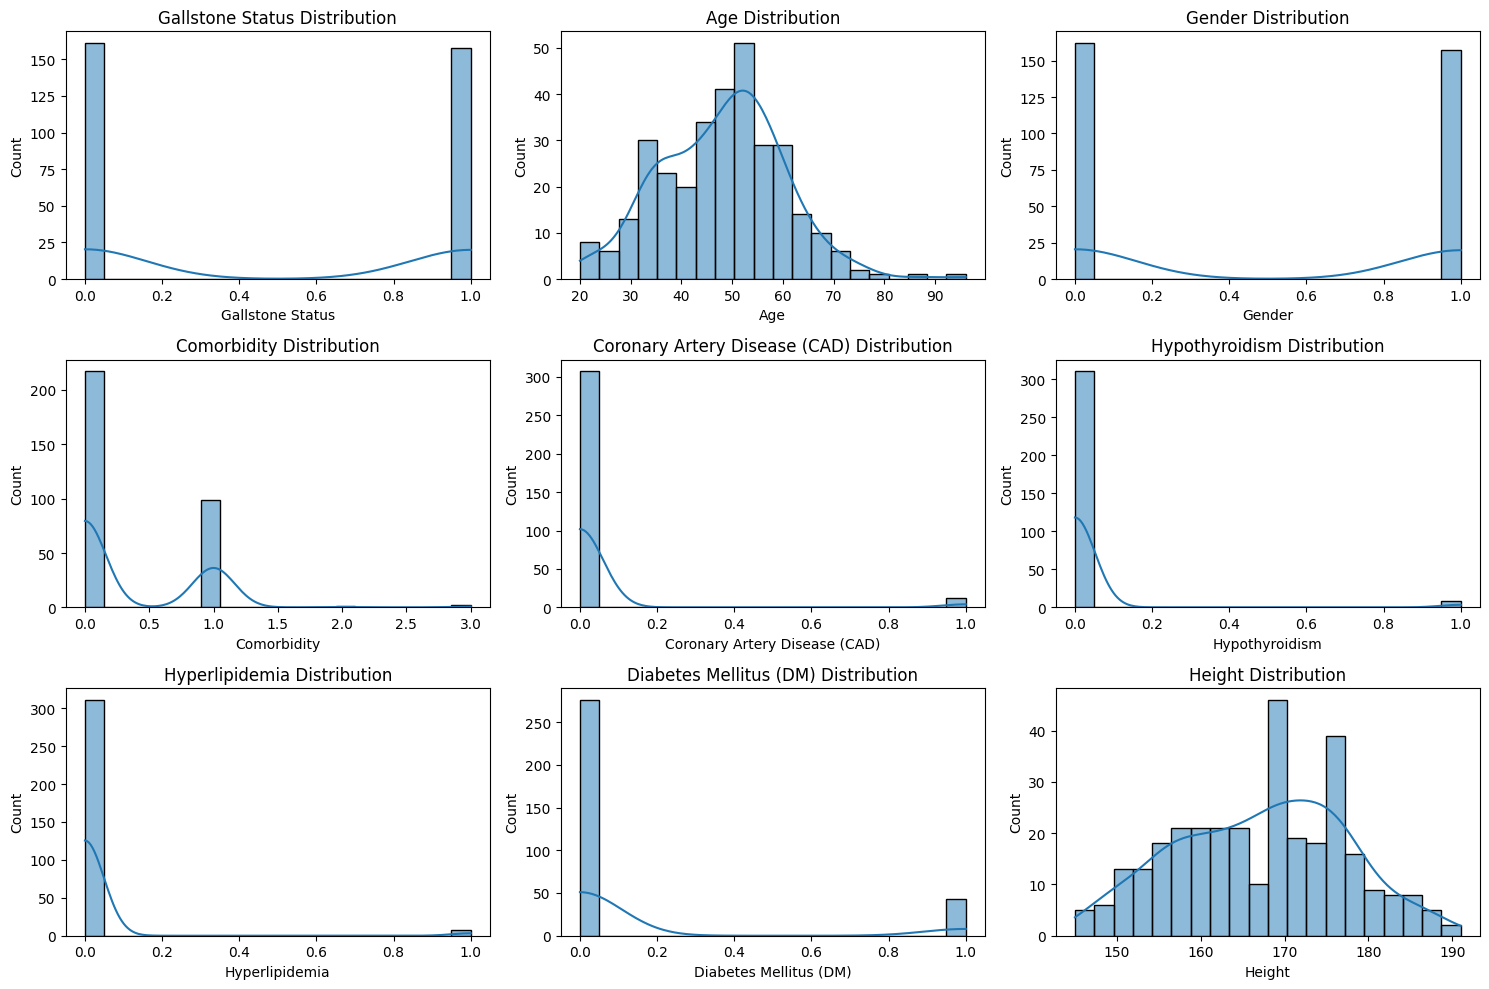

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols[:9], 1):  # first 9 just as sample
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


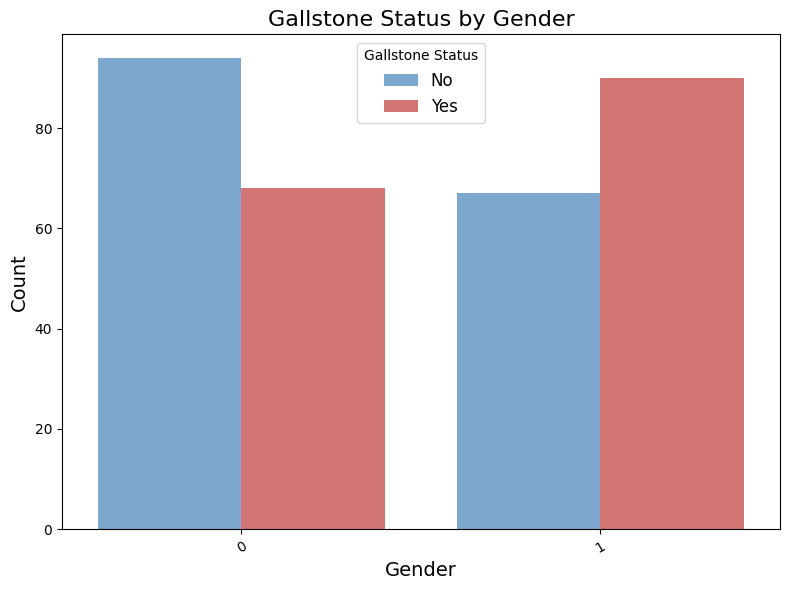

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='Gender',
    hue='Gallstone Status',
    palette=['#6FA8DC', '#E06666']
)

plt.title('Gallstone Status by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Gallstone Status', labels=['No', 'Yes'], fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


X = All the input features (the variables you use to make predictions)
Age, Gender, BMI, Diabetes, Cholesterol, etc.

Y= The target variable — what you want the model to predict Gallstone Status (0 = No, 1 = Yes)

In [ ]:
for c in list(df.columns):

    # get a list of unique values
    n = df[c].unique()

    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

Gallstone Status
[0 1]
Age: 56 unique values
Gender
[0 1]
Comorbidity
[0 1 3 2]
Coronary Artery Disease (CAD)
[0 1]
Hypothyroidism
[0 1]
Hyperlipidemia
[0 1]
Diabetes Mellitus (DM)
[0 1]
Height: 46 unique values
Weight: 245 unique values
Body Mass Index (BMI): 162 unique values
Total Body Water (TBW): 199 unique values
Extracellular Water (ECW): 109 unique values
Intracellular Water (ICW): 138 unique values
Extracellular Fluid/Total Body Water (ECF/TBW): 81 unique values
Total Body Fat Ratio (TBFR) (%): 228 unique values
Lean Mass (LM) (%): 294 unique values
Body Protein Content (Protein) (%): 259 unique values
Visceral Fat Rating (VFR)
[ 9 15  6  8 12  3 16  2  5 10 11 13 17 31 19  4 14  7 18  1 20 25]
Bone Mass (BM)
[3.7  3.2  3.3  2.9  3.5  2.4  3.   3.8  3.6  2.8  3.1  4.   2.6  3.4
 2.7  2.1  3.9  2.2  2.3  2.5  2.   1.9  3.05 1.8  1.4 ]
Muscle Mass (MM): 219 unique values
Obesity (%): 276 unique values
Total Fat Content (TFC): 212 unique values
Visceral Fat Area (VFA): 209 unique

In [ ]:
# Calculate missing percentages and unknown counts for specified columns
Gallston_percentage = df['Gallstone Status'].isnull().mean() * 100
Gender_percentage = df['Gender'].isnull().mean() * 100
print(
      f"- Percentage of missing values in 'Gallstone Status': {Gallston_percentage:.2f}%\n"
      f"- Percentage of missing values in 'Gender_percentage': {Gender_percentage:.2f}%\n" )


- Percentage of missing values in 'Gallstone Status': 0.00%
- Percentage of missing values in 'Gender_percentage': 0.00%



In [ ]:
print(df.isnull().sum())

Gallstone Status                                  0
Age                                               0
Gender                                            0
Comorbidity                                       0
Coronary Artery Disease (CAD)                     0
Hypothyroidism                                    0
Hyperlipidemia                                    0
Diabetes Mellitus (DM)                            0
Height                                            0
Weight                                            0
Body Mass Index (BMI)                             0
Total Body Water (TBW)                            0
Extracellular Water (ECW)                         0
Intracellular Water (ICW)                         0
Extracellular Fluid/Total Body Water (ECF/TBW)    0
Total Body Fat Ratio (TBFR) (%)                   0
Lean Mass (LM) (%)                                0
Body Protein Content (Protein) (%)                0
Visceral Fat Rating (VFR)                         0
Bone Mass (B

In [ ]:
# Check if there are any duplicates
has_duplicates = df.duplicated().any()
print("Are there any duplicates?", has_duplicates)

Are there any duplicates? False


In [5]:
# Define features (X) and target (y)
X = df.drop('Gallstone Status', axis=1)
y = df['Gallstone Status']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (319, 38)
y shape: (319,)


In [6]:
from sklearn.model_selection import train_test_split

# First split: training (60%) and temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42,
    stratify=y
)

# Split temp evenly into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)


Train: (191, 38) Validation: (64, 38) Test: (64, 38)


In [7]:
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)


Training set: (191, 38)
Validation set: (64, 38)
Test set: (64, 38)


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create model pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Train only on training data
pipe.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = pipe.predict(X_val)
print("Validation Results:")
print(classification_report(y_val, y_val_pred, target_names=['No Gallstone', 'Gallstone']))

# Final test evaluation (unseen data)
y_test_pred = pipe.predict(X_test)
print("Test Results:")
print(classification_report(y_test, y_test_pred, target_names=['No Gallstone', 'Gallstone']))


Validation Results:
              precision    recall  f1-score   support

No Gallstone       0.81      0.78      0.79        32
   Gallstone       0.79      0.81      0.80        32

    accuracy                           0.80        64
   macro avg       0.80      0.80      0.80        64
weighted avg       0.80      0.80      0.80        64

Test Results:
              precision    recall  f1-score   support

No Gallstone       0.76      0.85      0.80        33
   Gallstone       0.81      0.71      0.76        31

    accuracy                           0.78        64
   macro avg       0.79      0.78      0.78        64
weighted avg       0.78      0.78      0.78        64



In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_val_pred = dt.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))


Validation Accuracy: 0.734375


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_test_pred = dt.predict(X_test)

print("Test Set Results:")
print(classification_report(y_test, y_test_pred, target_names=['No Gallstone', 'Gallstone']))


Test Set Results:
              precision    recall  f1-score   support

No Gallstone       0.64      0.70      0.67        33
   Gallstone       0.64      0.58      0.61        31

    accuracy                           0.64        64
   macro avg       0.64      0.64      0.64        64
weighted avg       0.64      0.64      0.64        64



In [10]:
#Decision Tree Classifier (Tuned with GridSearchCV)

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best CV Accuracy: 0.7175438596491228


In [ ]:
best_dt = grid.best_estimator_
y_test_pred = best_dt.predict(X_test)
print("Tuned Test Accuracy:", accuracy_score(y_test, y_test_pred))


Tuned Test Accuracy: 0.671875


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_test_pred))


Random Forest Accuracy: 0.796875


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("RF Validation Accuracy:", rf.score(X_val, y_val))
print("RF Test Accuracy:", rf.score(X_test, y_test))


RF Validation Accuracy: 0.828125
RF Test Accuracy: 0.796875


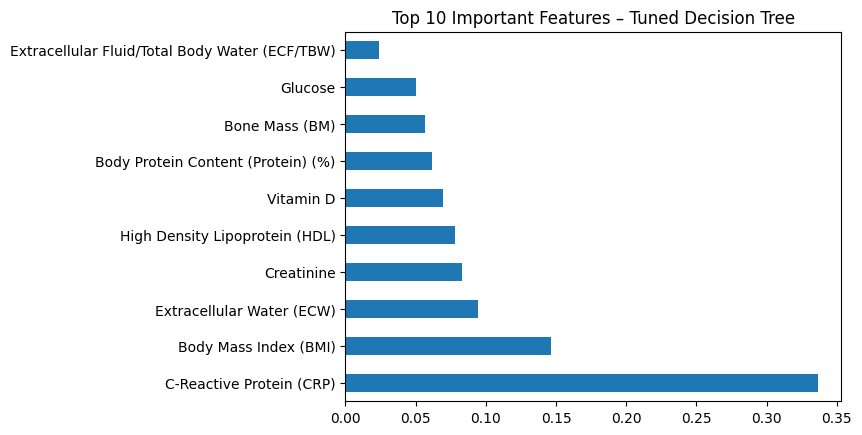

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
imp = pd.Series(best_dt.feature_importances_, index=X.columns)
imp.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features – Tuned Decision Tree')
plt.show()


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Create pipeline: scaling + model
log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Train
log_reg.fit(X_train, y_train)

# Validate
y_val_pred = log_reg.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Test
y_test_pred = log_reg.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, target_names=['No Gallstone', 'Gallstone']))


Validation Accuracy: 0.796875
Test Accuracy: 0.78125
              precision    recall  f1-score   support

No Gallstone       0.76      0.85      0.80        33
   Gallstone       0.81      0.71      0.76        31

    accuracy                           0.78        64
   macro avg       0.79      0.78      0.78        64
weighted avg       0.78      0.78      0.78        64

